In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bigmart_train = pd.read_csv('Train_BM.csv')
bigmart_train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [3]:
bigmart_test = pd.read_csv('Test_BM.csv')   
bigmart_test.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1


Let us merge the test and train for avoiding preproccessing again and again;
Also to help in cross validation by dividing the whole in train,validation and test set

EDA for data analysis on TRAIN dataset

In [4]:
bigmart_train.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [5]:
bigmart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [6]:
#convert object to category as only few are unique
bigmart_train['Item_Identifier'] = bigmart_train['Item_Identifier'].astype('category')
bigmart_train['Item_Fat_Content'] = bigmart_train['Item_Fat_Content'].astype('category')
bigmart_train['Item_Type'] = bigmart_train['Item_Type'].astype('category')
bigmart_train['Outlet_Identifier'] = bigmart_train['Outlet_Identifier'].astype('category')
bigmart_train['Outlet_Size'] = bigmart_train['Outlet_Size'].astype('category')
bigmart_train['Outlet_Type'] = bigmart_train['Outlet_Type'].astype('category')
bigmart_train['Outlet_Location_Type'] = bigmart_train['Outlet_Location_Type'].astype('category')

Perform EDA on categorical features

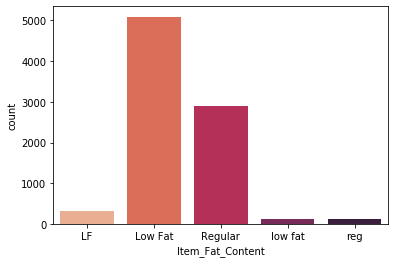

In [7]:
sns.countplot('Item_Fat_Content',data=bigmart_train,palette='rocket_r')
plt.show()#can be seen that LF+LowFat+low fat=LF and reg + Regular =reg 

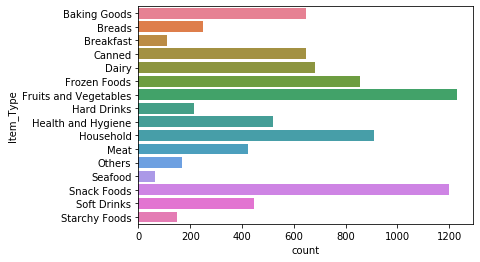

In [8]:
sns.countplot(y='Item_Type',data=bigmart_train,palette='husl')
plt.show()

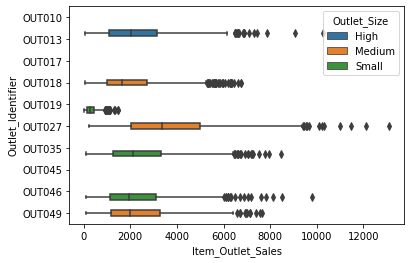

In [9]:
sns.boxplot(y='Outlet_Identifier',x='Item_Outlet_Sales',hue='Outlet_Size',data=bigmart_train)
plt.show()#seen that there sre some missing values in OutletSize

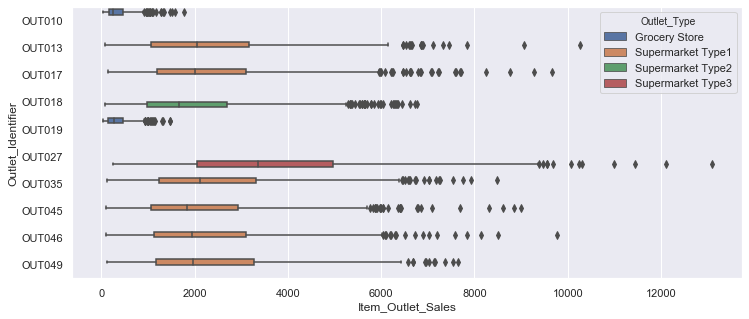

In [10]:
sns.set(rc={'figure.figsize':(12,5)})
sns.boxplot(y='Outlet_Identifier',x='Item_Outlet_Sales',hue='Outlet_Type',data=bigmart_train)
plt.show()

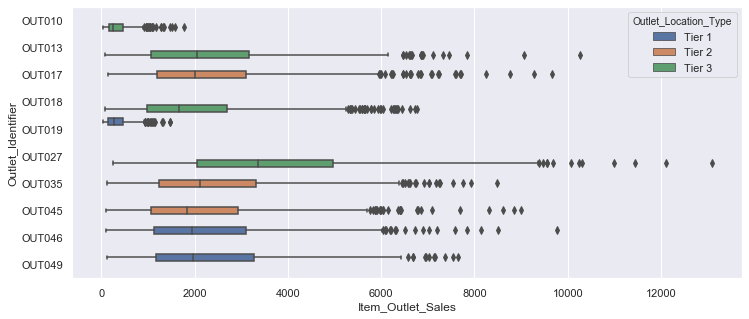

In [11]:
sns.set(rc={'figure.figsize':(12,5)})
sns.boxplot(y='Outlet_Identifier',x='Item_Outlet_Sales',hue='Outlet_Location_Type',data=bigmart_train)
plt.show() #no visible information as such

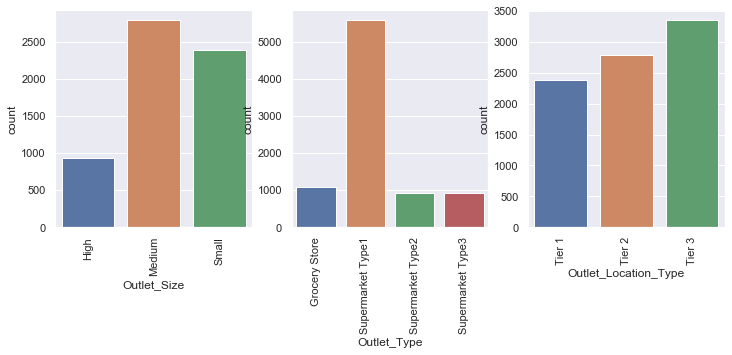

In [12]:
sns.set(rc={'figure.figsize':(12,4)})
fig,ax = plt.subplots(1,3)
sns.countplot('Outlet_Size',data=bigmart_train,ax=ax[0])
sns.countplot('Outlet_Type',data=bigmart_train,ax=ax[1])
sns.countplot('Outlet_Location_Type',data=bigmart_train,ax=ax[2])
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
plt.show()

In [13]:
merge_data = pd.concat([bigmart_train,bigmart_test],ignore_index=True,sort=True)
merge_data.head(10)


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1


In [14]:
merge_data['Outlet_Size'].isnull().sum()

4016

In [15]:
merge_data['Item_Weight'].isnull().sum()

2439

C:\Users\R542U\AppData\Local\conda\conda\envs\py36\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\R542U\AppData\Local\conda\conda\envs\py36\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


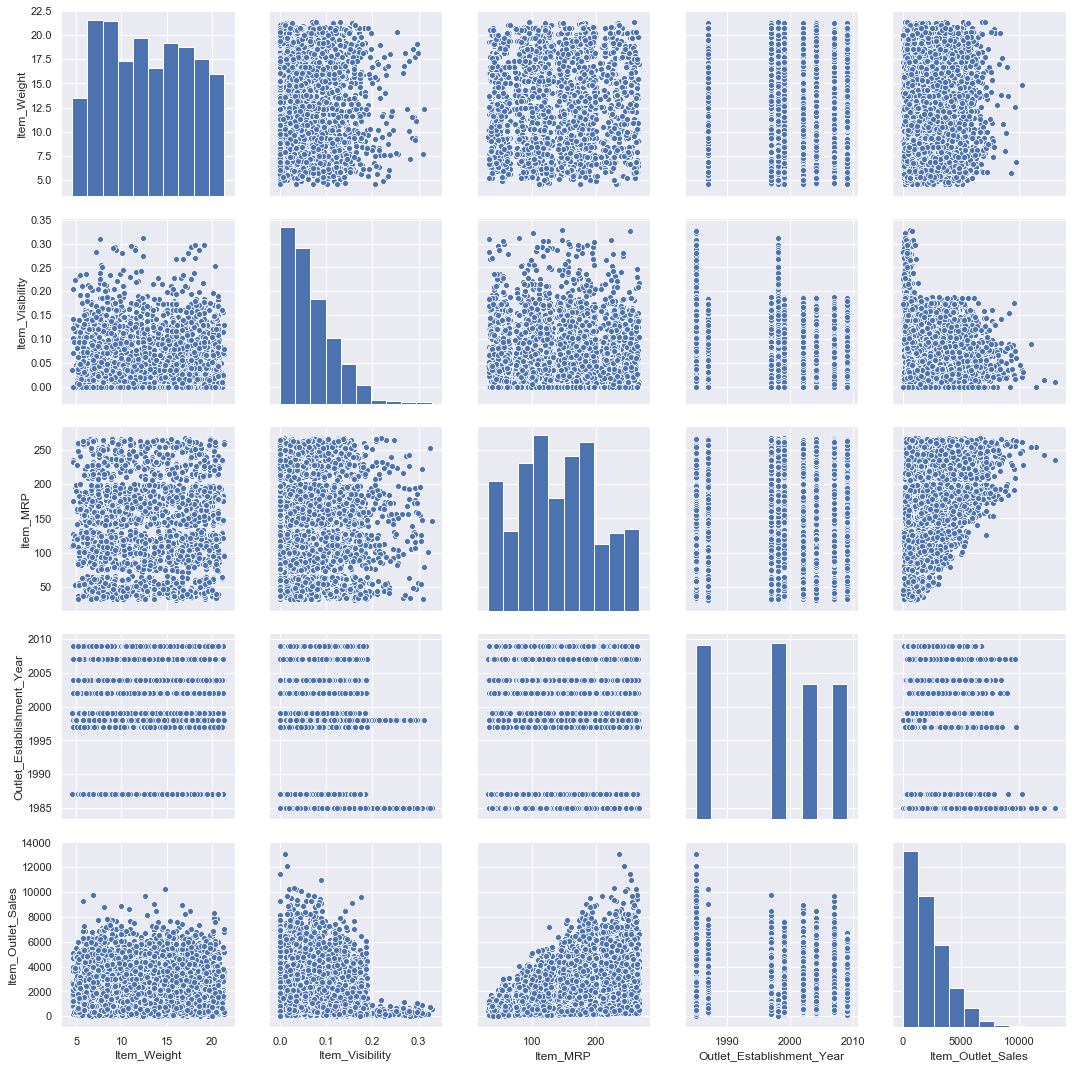

In [16]:
sns.pairplot(bigmart_train,height=3)

C:\Users\R542U\AppData\Local\conda\conda\envs\py36\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\R542U\AppData\Local\conda\conda\envs\py36\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


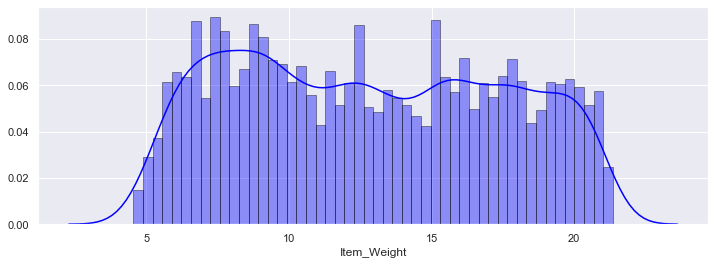

In [17]:
sns.distplot(merge_data['Item_Weight'],hist=True,color='blue',kde=True,bins=50,hist_kws={'edgecolor':'black'})
plt.show()

In [18]:
from sklearn.impute import SimpleImputer

In [19]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [20]:
avg_item_weight = merge_data.pivot_table(values='Item_Weight',index='Item_Identifier')
avg_item_weight.tail()

,Item_Weight
Item_Identifier,
NCZ30,6.59
NCZ41,19.85
NCZ42,10.50
NCZ53,9.60
NCZ54,14.65


In [21]:
avg_item_weight.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1559 entries, DRA12 to NCZ54
Data columns (total 1 columns):
Item_Weight    1559 non-null float64
dtypes: float64(1)
memory usage: 24.4+ KB


In [22]:
grouped_dataframe = avg_item_weight.groupby(by=['Item_Identifier']).mean()
grouped_dataframe.head()

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


In [23]:
merge_data[merge_data.Item_Identifier == 'FDP10'].head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3
585,Low Fat,FDP10,104.3622,1905.5196,Snack Foods,0.128066,19.0,2004,OUT035,Tier 2,Small,Supermarket Type1
2623,Low Fat,FDP10,107.6622,1164.4842,Snack Foods,0.128815,19.0,2007,OUT017,Tier 2,NaN,Supermarket Type1
3382,Low Fat,FDP10,104.9622,1164.4842,Snack Foods,0.128289,19.0,1999,OUT049,Tier 1,Medium,Supermarket Type1
4585,Low Fat,FDP10,107.0622,1376.2086,Snack Foods,0.128090,19.0,1997,OUT046,Tier 1,Small,Supermarket Type1


In [24]:
miss_weight = merge_data.Item_Weight.isnull()
#len(merge_data.loc[miss_weight,['Item_Weight']])
#len(avg_item_weight.loc[miss_weight,['Item_Weight']])
merge_data.loc[miss_weight,['Item_Weight']].index

Int64Index([    7,    18,    21,    23,    29,    36,    38,    39,    49,
               59,
            ...
            14150, 14157, 14163, 14166, 14171, 14178, 14179, 14184, 14188,
            14192],
           dtype='int64', length=2439)

In [25]:
for i in (merge_data.loc[miss_weight,['Item_Weight']].index):
    item = merge_data.Item_Identifier[i]
    merge_data.Item_Weight[i] =np.mean(merge_data.Item_Weight[merge_data['Item_Identifier']==item])


C:\Users\R542U\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
merge_data.Item_Weight[merge_data['Item_Identifier']=='DRA12']

118      11.6
1197     11.6
1245     11.6
1693     11.6
7467     11.6
8043     11.6
9023     11.6
12435    11.6
13604    11.6
Name: Item_Weight, dtype: float64

In [27]:
merge_data.Item_Weight.isnull().sum()

0

In [28]:
merge_data.Item_Weight[miss_weight].head()

7     19.000
18     8.260
21     8.315
23    15.500
29    14.500
Name: Item_Weight, dtype: float64

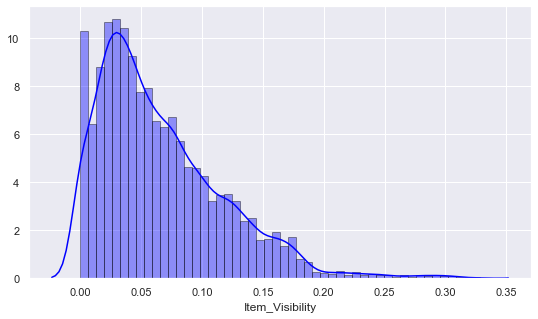

In [29]:
sns.set(rc={'figure.figsize':(9,5)})
sns.distplot(merge_data['Item_Visibility'],hist=True,color='blue',kde=True,bins=50,hist_kws={'edgecolor':'black'})
plt.show()

In [30]:
merge_data['Outlet_Size'].agg('mode')

0    Medium
dtype: object

In [31]:
merge_data['Outlet_Size'].fillna('Medium',inplace=True)
merge_data['Outlet_Size'].isnull().sum()

0

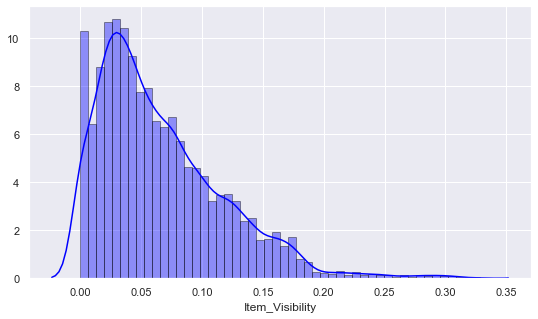

In [32]:
sns.set(rc={'figure.figsize':(9,5)})
sns.distplot(merge_data['Item_Visibility'],hist=True,color='blue',kde=True,bins=50,hist_kws={'edgecolor':'black'})
plt.show()

In [33]:
#combine lf and regular

In [34]:
merge_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [35]:
merge_data["Item_Fat_Content"].replace('low fat','Low Fat',inplace=True)
merge_data["Item_Fat_Content"].replace('LF','Low Fat',inplace=True)
merge_data["Item_Fat_Content"].replace('reg','Regular',inplace=True)
merge_data["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [36]:
merge_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [37]:
for item in merge_data['Item_Identifier']:
    merge_data['Item_Identifier'].replace(item,item[:2],inplace=True)
merge_data['Item_Identifier'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [38]:
merge_data.loc[merge_data['Item_Identifier']=='NC','Item_Fat_Content'] = 'Non-edible'
#merge_data.loc[merge_data['Item_Identifier']=='NC']

In [39]:
merge_data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'Non-edible'], dtype=object)

In [40]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

In [41]:
visibility = merge_data.pivot_table(values='Item_Visibility',index='Item_Identifier')
visibility

,Item_Visibility
Item_Identifier,
DR,0.064836
FD,0.068098
NC,0.058354


In [42]:
miss_visibility = merge_data[merge_data['Item_Visibility']== 0].index
miss_visibility

Int64Index([    3,     4,     5,    10,    32,    33,    46,    60,    72,
               79,
            ...
            14120, 14126, 14134, 14137, 14158, 14166, 14171, 14177, 14184,
            14202],
           dtype='int64', length=879)

In [43]:
visibility.loc['DR']

Item_Visibility    0.064836
Name: DR, dtype: float64

In [44]:
for data in miss_visibility:
    iden = merge_data.Item_Identifier[data]
    merge_data.Item_Visibility[data] = visibility.loc[iden]

C:\Users\R542U\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
merge_data[merge_data['Item_Visibility']==0]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type


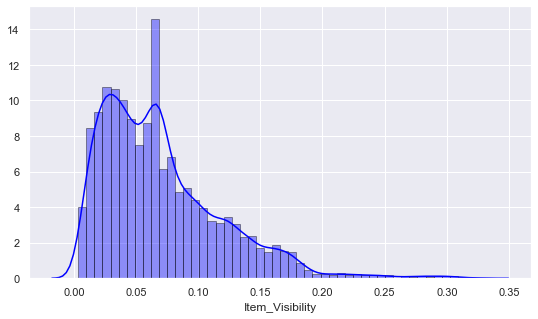

In [46]:
#merge_data['Item_Visibility'] = normalize(merge_data['Item_Visibility'])

sns.set(rc={'figure.figsize':(9,5)})
sns.distplot(merge_data['Item_Visibility'],hist=True,color='blue',kde=True,bins=50,hist_kws={'edgecolor':'black'})
plt.show()

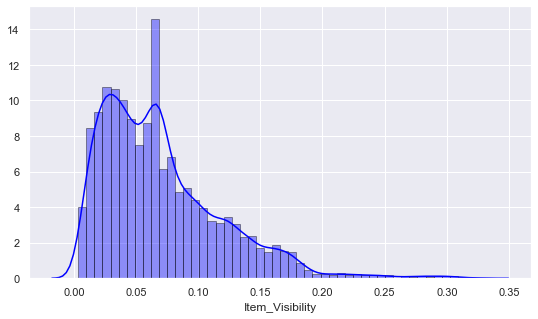

In [47]:
sns.set(rc={'figure.figsize':(9,5)})
sns.distplot(merge_data['Item_Visibility'],hist=True,color='blue',kde=True,bins=50,hist_kws={'edgecolor':'black'})
plt.show()

In [48]:
merge_data['Age'] = 2013 - merge_data.Outlet_Establishment_Year

In [49]:
merge_data.Age.head()

0    14
1     4
2    14
3    15
4    26
Name: Age, dtype: int64

In [50]:
merge_data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Age
0,Low Fat,FD,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,14
1,Regular,DR,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,4
2,Low Fat,FD,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,14
3,Regular,FD,182.0950,732.3800,Fruits and Vegetables,0.068098,19.20,1998,OUT010,Tier 3,Medium,Grocery Store,15
4,Non-edible,NC,53.8614,994.7052,Household,0.058354,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,26


In [51]:
col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type','Item_Identifier']

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [53]:
merge_data['Outlet'] = le.fit_transform(merge_data['Outlet_Identifier'])

In [54]:
for i in col:
    merge_data[i] = le.fit_transform(merge_data[i])

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [56]:
cols = ['Item_MRP',
       'Item_Visibility', 'Item_Weight', 'Age', 'Item_Fat_Content',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type',
       'Item_Type', 'Outlet', 'Item_Identifier']

In [57]:
test = merge_data[merge_data["Item_Outlet_Sales"].isnull()]
train = merge_data[merge_data["Item_Outlet_Sales"].notnull()]
test.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Age,Outlet
8523,0,1,107.8622,NaN,13,0.007565,20.750,1999,OUT049,0,1,1,14,9
8524,2,1,87.3198,NaN,4,0.038428,8.300,2007,OUT017,1,1,1,6,2
8525,1,2,241.7538,NaN,11,0.099575,14.600,1998,OUT010,2,1,0,15,0
8526,0,1,155.0340,NaN,13,0.015388,7.315,2007,OUT017,1,1,1,6,2
8527,2,1,234.2300,NaN,4,0.118599,13.600,1985,OUT027,2,1,3,28,5


In [58]:
train.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Age,Outlet
0,0,1,249.8092,3735.1380,4,0.016047,9.30,1999,OUT049,0,1,1,14,9
1,2,0,48.2692,443.4228,14,0.019278,5.92,2009,OUT018,2,1,2,4,3
2,0,1,141.6180,2097.2700,10,0.016760,17.50,1999,OUT049,0,1,1,14,9
3,2,1,182.0950,732.3800,6,0.068098,19.20,1998,OUT010,2,1,0,15,0
4,1,2,53.8614,994.7052,9,0.058354,8.93,1987,OUT013,2,0,1,26,1


In [59]:
cormat = merge_data.corr()

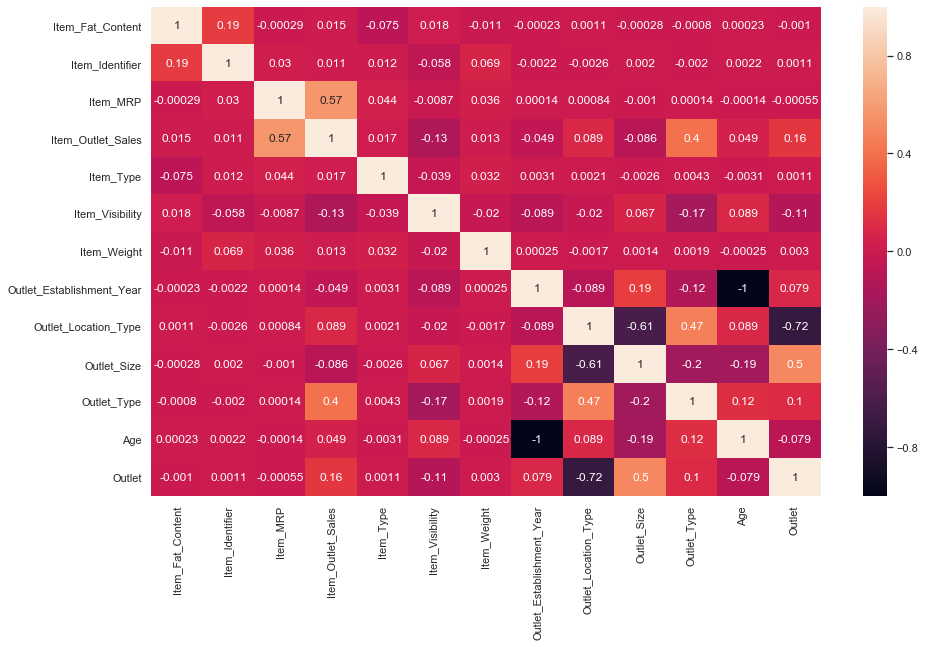

In [60]:
sns.set(rc={'figure.figsize':(15,9)})
sns.heatmap(cormat,annot=True)
plt.show()

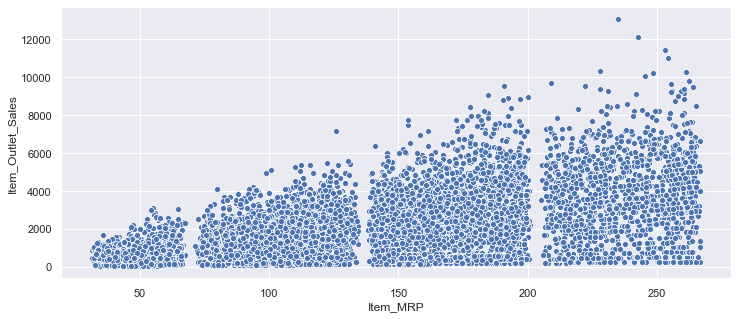

In [61]:
sns.set(rc={'figure.figsize':(12,5)})
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',data=merge_data)
plt.show()

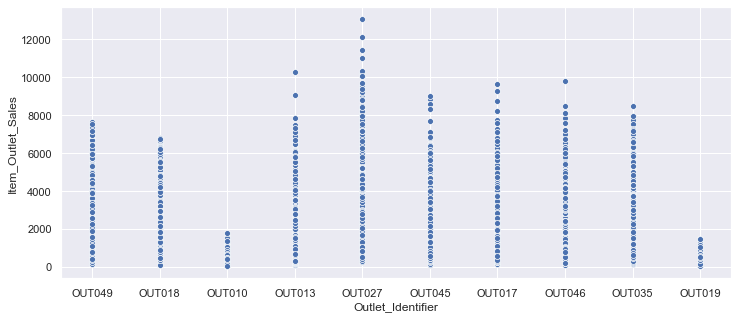

In [62]:
sns.set(rc={'figure.figsize':(12,5)})
sns.scatterplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=merge_data)
plt.show()

In [63]:
X = train.drop("Item_Outlet_Sales",axis=1) 
X = train[cols]
y = train['Item_Outlet_Sales']
y.isnull().any()

False

In [64]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV

In [75]:
#copied from Analytics Vidhya
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
def modelfit(alg, dtrain, dtest, predictors, target,IDcol,filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print( model report:
    print( "\nModel Report")
    print( "RMSE : %.4g" % np.sqrt(mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print( "CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    print(cv_score)
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    #Export submission file:
    '''IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False,header=True)'''
    testfinal = pd.read_csv("SampleSubmission_TmnO39y.csv")
    testfinal["Item_Outlet_Sales"] = alg.predict(dtest[predictors])
    return testfinal

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)

In [67]:
predictors = [x for x in train.columns if x not in [target]+IDcol ]

In [68]:
testfinal = pd.read_csv("SampleSubmission_TmnO39y.csv")

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

In [70]:
GBR = GradientBoostingRegressor()
temp = modelfit(GBR,train,test,predictors,target,IDcol,r'SubmissionGBR')
temp.head()


Model Report
RMSE : 1035
CV Score : Mean - 1084 | Std - 43.8 | Min - 1014 | Max - 1168
[1161.90262541 1075.13449298 1084.49513545 1096.07375185 1102.23086765
 1095.84649984 1024.1634671  1093.47097019 1093.33523018 1070.83446598
 1031.15671901 1110.04175154 1068.31249696 1039.16337497 1026.00370916
 1146.99804265 1123.27147042 1014.33736802 1168.38178653 1050.73990571]


C:\Users\R542U\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1304.607917
1,FDW14,OUT017,1416.795151
2,NCN55,OUT010,577.734063
3,FDQ58,OUT017,2547.165642
4,FDY38,OUT027,6122.462139


In [71]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 3 columns):
Item_Identifier      5681 non-null object
Outlet_Identifier    5681 non-null object
Item_Outlet_Sales    5681 non-null float64
dtypes: float64(1), object(2)
memory usage: 133.2+ KB


In [72]:
temp.to_csv (r'submissionGBR.csv', index = False, header=True)

# For this approach the score was: 1153.3758699655

The highest (2:59 PM, 3/25/2020): 1128.1981653505


The following code did not work by passing parameters

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler = StandardScaler()

In [84]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
params_GBR_GS = {"max_depth": [3,5,6,7],
              "max_features":['auto', 'sqrt', 'log2'],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
            'learning_rate':[0.05,0.1,0.2],
            'n_estimators': [10,30,50,70]}

In [77]:
model_GradR2_GS = GridSearchCV(GradientBoostingRegressor(), param_grid=params_GBR_GS)
model_GradR2_GS.fit(X_train,y_train)

C:\Users\R542U\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n...
                             

In [78]:
model_GradR2_GS.best_score_

0.5998192942157986

In [79]:
print(model_GradR2_GS.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 70}


In [183]:
GBR = GradientBoostingRegressor(learning_rate=0.1,max_depth=3,max_features='auto',min_samples_leaf=5,min_samples_split=10,n_estimators=50,random_state=42)
modefit = GBR.fit(X_train,y_train)

msetrain = mean_squared_error(y_true=y_train,y_pred=modefit.predict(X_train))
msetest = mean_squared_error(y_true=y_test,y_pred=modefit.predict(X_test))
print("Training: {},\nTesting: {}".format(np.sqrt(msetrain),np.sqrt(msetest)))


Training: 1049.9811924750275,
Testing: 1085.0300084556297


In [185]:
GBR = GradientBoostingRegressor(learning_rate=0.1,max_depth=3,max_features='auto',min_samples_leaf=5,min_samples_split=10,n_estimators=50,random_state=42)
modefit = GBR.fit(train[predictors],train[target])
mse = mean_squared_error(y_true=train[target],y_pred=modefit.predict(train[predictors]))
print(np.sqrt(mse))

1056.8240306391183


In [186]:
testfinal = pd.read_csv("SampleSubmission_TmnO39y.csv")

In [188]:
testfinal["Item_Outlet_Sales"] = modefit.predict(test[cols])
testfinal.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1033.052049
1,FDW14,OUT017,965.759814
2,NCN55,OUT010,965.759814
3,FDQ58,OUT017,965.759814
4,FDY38,OUT027,965.759814


In [189]:
testfinal.Item_Outlet_Sales.isnull().any()

False

In [ ]:
import xgboost